In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder


from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from xgboost import XGBClassifier


from sklearn.metrics import accuracy_score, classification_report

In [3]:
data=pd.read_csv('../data/heart_disease_patients.csv')
data.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
0,1,63,1,1,145,233,1,2,150,0,2.3,3
1,2,67,1,4,160,286,0,2,108,1,1.5,2
2,3,67,1,4,120,229,0,2,129,1,2.6,2
3,4,37,1,3,130,250,0,0,187,0,3.5,3
4,5,41,0,2,130,204,0,2,172,0,1.4,1


In [4]:
data.isna().sum()

id          0
age         0
sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
dtype: int64

In [5]:
data.duplicated().sum()

np.int64(0)

In [6]:
data.dtypes

id            int64
age           int64
sex           int64
cp            int64
trestbps      int64
chol          int64
fbs           int64
restecg       int64
thalach       int64
exang         int64
oldpeak     float64
slope         int64
dtype: object

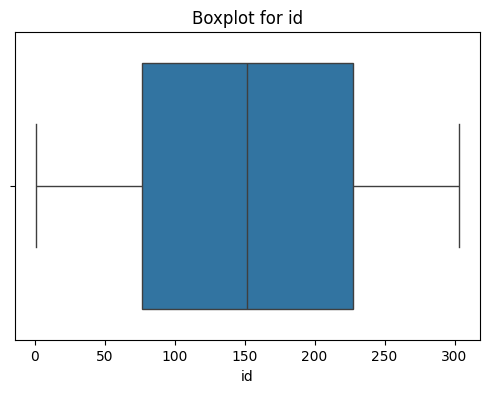

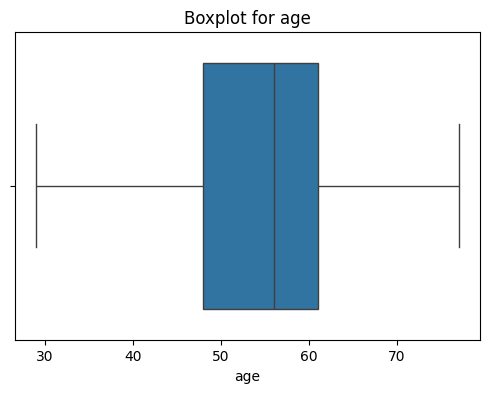

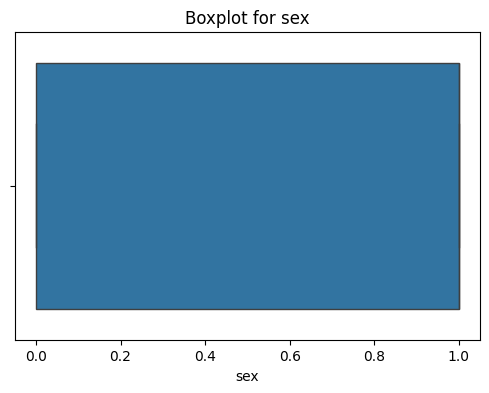

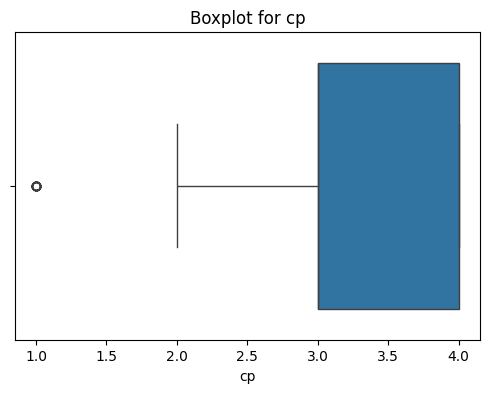

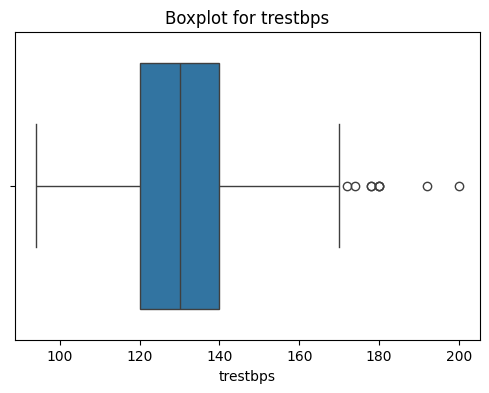

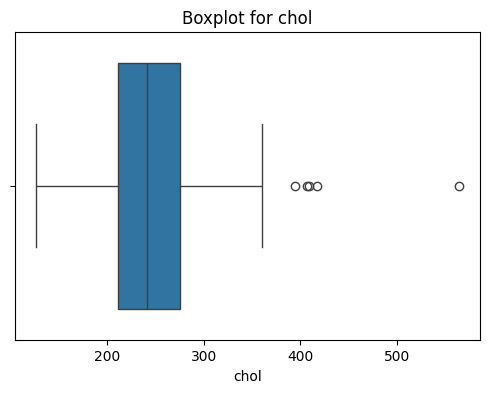

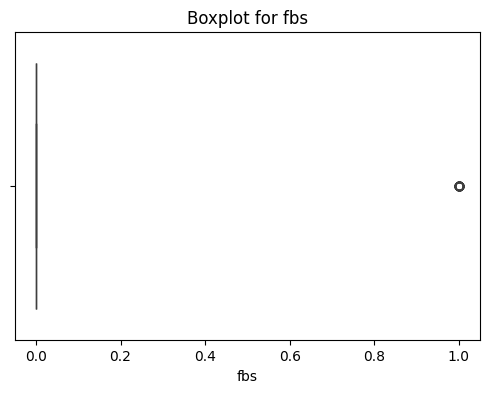

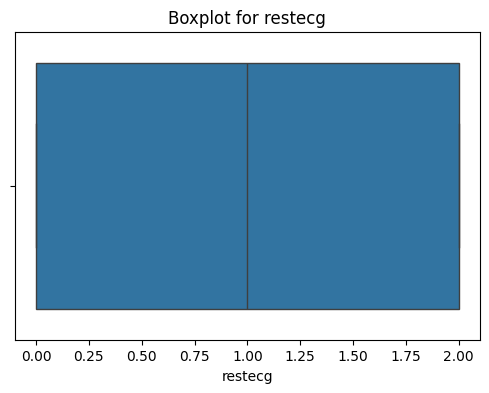

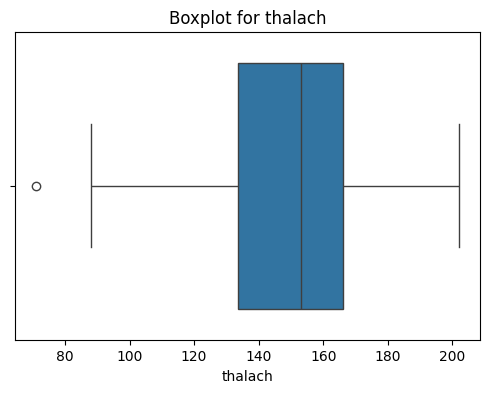

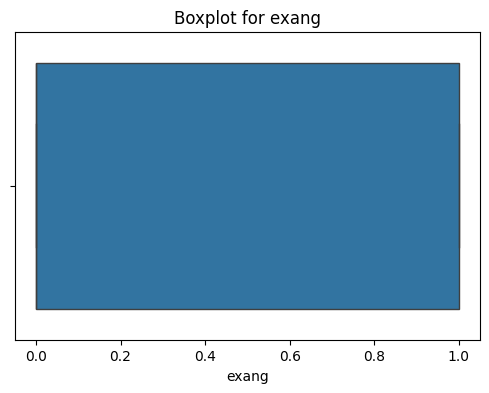

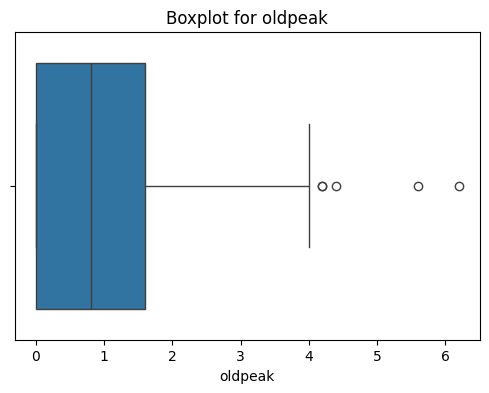

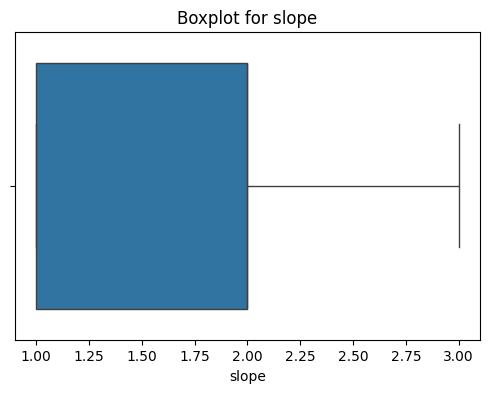

In [7]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [8]:
def handle_outliers_clip(data):
    for col in data.select_dtypes(include=[np.number]).columns:
        Q1 = data[col].quantile(0.25)
        Q3 = data[col].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        data[col] = data[col].clip(lower=lower_bound, upper=upper_bound)    
    return data

data_no_outliers_clip = handle_outliers_clip(data)
print(data_no_outliers_clip.head())

   id  age  sex   cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0   1   63    1  1.5       145   233    0        2    150.0      0      2.3   
1   2   67    1  4.0       160   286    0        2    108.0      1      1.5   
2   3   67    1  4.0       120   229    0        2    129.0      1      2.6   
3   4   37    1  3.0       130   250    0        0    187.0      0      3.5   
4   5   41    0  2.0       130   204    0        2    172.0      0      1.4   

   slope  
0      3  
1      2  
2      2  
3      3  
4      1  


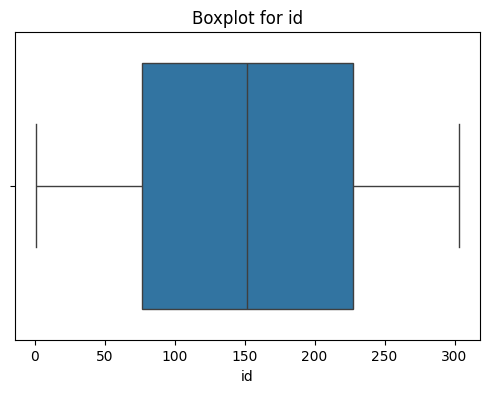

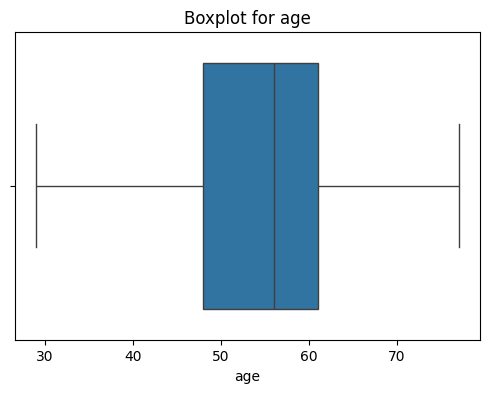

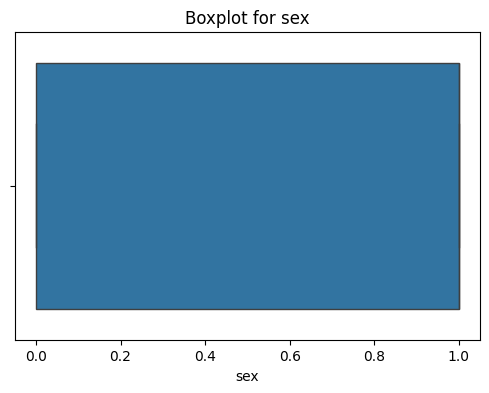

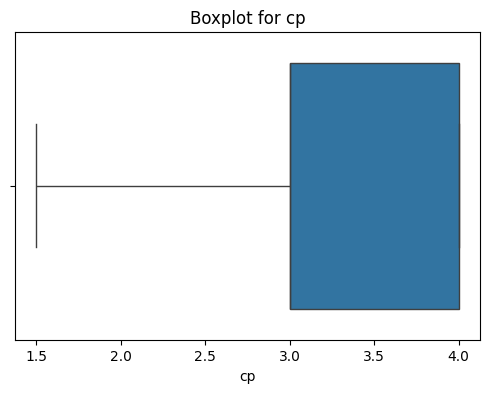

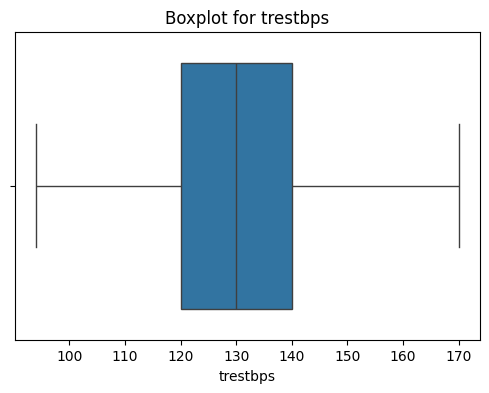

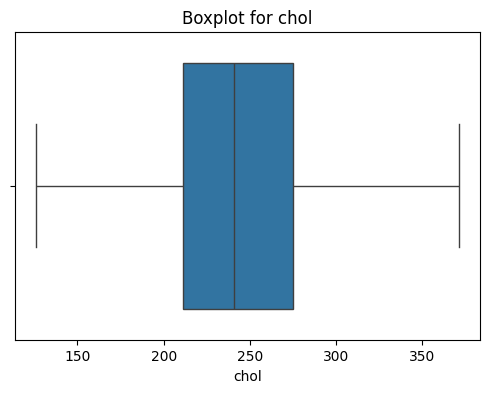

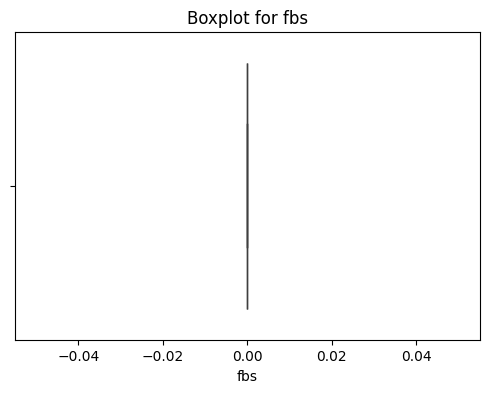

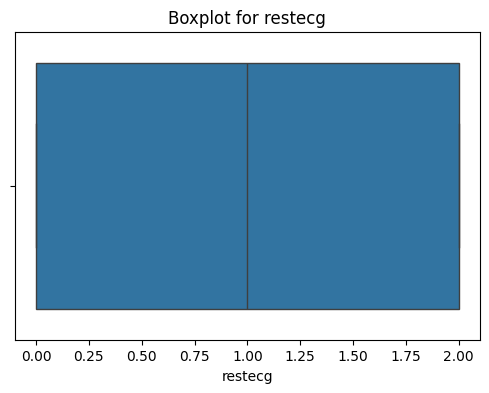

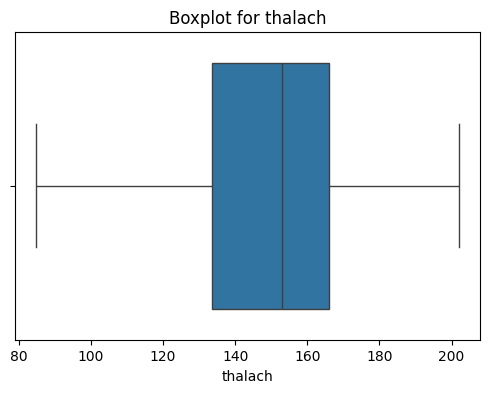

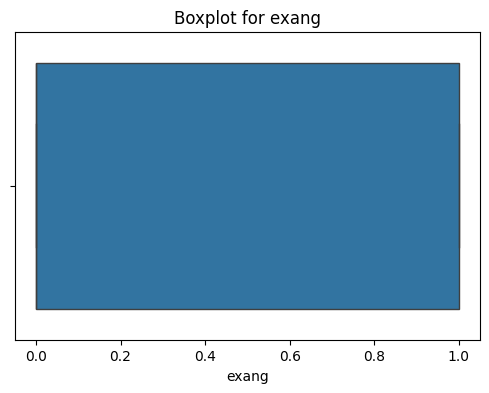

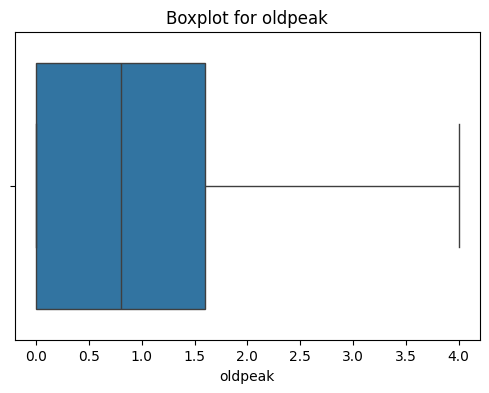

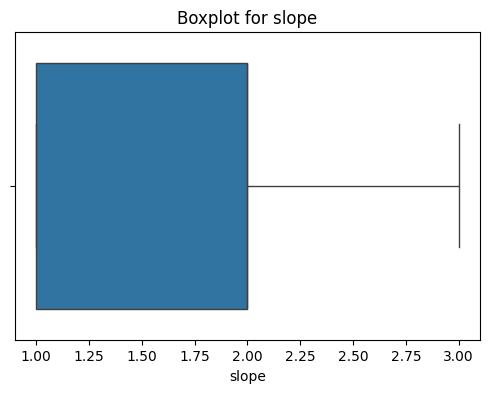

In [9]:
data.columns = data.columns.str.strip()
numeric_columns = data.select_dtypes(include=[np.number]).columns
for col in numeric_columns:
    plt.figure(figsize=(6, 4))  
    sns.boxplot(x=data[col])    
    plt.title(f"Boxplot for {col}")  
    plt.show()

In [11]:
X = data.drop('id', axis=1)

# Feature scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


# DBSCAN

In [51]:
classifiers = {
    'Random Forest Classifier': RandomForestClassifier(n_estimators=47, random_state=34),
    'Logistic Regression': LogisticRegression(random_state=42),
    'SVM': SVC(kernel='linear'),
    'KNN': KNeighborsClassifier(n_neighbors=5),
    'Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42, max_depth=5),
    'AdaBoost': AdaBoostClassifier(n_estimators=50, random_state=42, learning_rate=0.3),
    'Gradient Boosting': GradientBoostingClassifier(n_estimators=600, learning_rate=0.05, random_state=42),
    # 'XGBoost': XGBClassifier(n_estimators=100, learning_rate=0.1, max_depth=3, random_state=42, use_label_encoder=False, eval_metric='mlogloss')
}


In [52]:
from sklearn.cluster import DBSCAN
dbscan = DBSCAN(eps=1.1, min_samples=3)
labels = dbscan.fit_predict(X_scaled)
Y = labels  
X_train, X_test, y_train, y_test = train_test_split(X_scaled, Y, test_size=0.2, random_state=42)


for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train the model
    y_pred = clf.predict(X_test)  # Make predictions on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')


Random Forest Classifier Accuracy: 90.16%
Logistic Regression Accuracy: 93.44%
SVM Accuracy: 95.08%
KNN Accuracy: 93.44%
Naive Bayes Accuracy: 86.89%
Decision Tree Accuracy: 90.16%
AdaBoost Accuracy: 90.16%
Gradient Boosting Accuracy: 90.16%


In [53]:
noise_points = sum(labels == -1)
valid_labels = labels[labels != -1]
print(f'Number of noise points: {noise_points}')
print(f'Number of valid clusters: {len(set(valid_labels))}')

Number of noise points: 276
Number of valid clusters: 6


# KMeans

In [54]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=5, random_state=42)
labels_kmeans = kmeans.fit_predict(X_scaled)

y_kmeans = labels_kmeans
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_kmeans, test_size=0.2, random_state=42)

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train the model
    y_pred = clf.predict(X_test)  # Make predictions on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')

Random Forest Classifier Accuracy: 86.89%
Logistic Regression Accuracy: 98.36%
SVM Accuracy: 95.08%
KNN Accuracy: 93.44%
Naive Bayes Accuracy: 93.44%
Decision Tree Accuracy: 81.97%
AdaBoost Accuracy: 78.69%
Gradient Boosting Accuracy: 93.44%


# Heirarichial

In [55]:
from sklearn.cluster import AgglomerativeClustering
hierarchical = AgglomerativeClustering(n_clusters=5)
labels_hierarchical = hierarchical.fit_predict(X_scaled)

y_hierarchical = labels_hierarchical
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_hierarchical, test_size=0.2, random_state=42)

for name, clf in classifiers.items():
    clf.fit(X_train, y_train)  # Train the model
    y_pred = clf.predict(X_test)  # Make predictions on the test set
    accuracy = accuracy_score(y_test, y_pred)  # Calculate accuracy
    print(f'{name} Accuracy: {accuracy * 100:.2f}%')

Random Forest Classifier Accuracy: 93.44%
Logistic Regression Accuracy: 90.16%
SVM Accuracy: 98.36%
KNN Accuracy: 95.08%
Naive Bayes Accuracy: 80.33%
Decision Tree Accuracy: 86.89%
AdaBoost Accuracy: 77.05%
Gradient Boosting Accuracy: 98.36%


In [11]:
# END